## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE =[2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
for bachSize in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bachSize, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(bachSize)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0730 09:49:33.197407  7892 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 09:49:39.061986  7892 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 09:49:39.151723  7892 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 09:49:39.260433  7892 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0730 09:49:41.709533  7892 deprecation_wrapper.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 313s 6ms/step - loss: 2.2541 - acc: 0.1544 - val_loss: 3.2287 - val_acc: 0.1515
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________

50000/50000 [==============================] - 43s 856us/step - loss: 1.0987 - acc: 0.6104 - val_loss: 1.3456 - val_acc: 0.5235
Epoch 49/50
50000/50000 [==============================] - 43s 858us/step - loss: 1.0891 - acc: 0.6119 - val_loss: 1.3243 - val_acc: 0.5380
Epoch 50/50
50000/50000 [==============================] - 43s 861us/step - loss: 1.1050 - acc: 0.6077 - val_loss: 1.3762 - val_acc: 0.5206
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328   

50000/50000 [==============================] - 22s 446us/step - loss: 0.8104 - acc: 0.7116 - val_loss: 1.6280 - val_acc: 0.4946
Epoch 47/50
50000/50000 [==============================] - 22s 438us/step - loss: 0.8091 - acc: 0.7120 - val_loss: 1.5937 - val_acc: 0.4967
Epoch 48/50
50000/50000 [==============================] - 22s 445us/step - loss: 0.8017 - acc: 0.7138 - val_loss: 1.5929 - val_acc: 0.4988
Epoch 49/50
50000/50000 [==============================] - 22s 445us/step - loss: 0.8025 - acc: 0.7153 - val_loss: 1.5943 - val_acc: 0.5054
Epoch 50/50
50000/50000 [==============================] - 22s 442us/step - loss: 0.7912 - acc: 0.7173 - val_loss: 1.5610 - val_acc: 0.5026
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)        

50000/50000 [==============================] - 10s 206us/step - loss: 0.3166 - acc: 0.8944 - val_loss: 2.4232 - val_acc: 0.4668
Epoch 45/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.3067 - acc: 0.8957 - val_loss: 2.4848 - val_acc: 0.4431
Epoch 46/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.3049 - acc: 0.8950 - val_loss: 2.3233 - val_acc: 0.4565
Epoch 47/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.2944 - acc: 0.9002 - val_loss: 2.4542 - val_acc: 0.4661
Epoch 48/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.2810 - acc: 0.9058 - val_loss: 2.3562 - val_acc: 0.4673
Epoch 49/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.2642 - acc: 0.9112 - val_loss: 2.5842 - val_acc: 0.4498
Epoch 50/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.2603 - acc: 0.9127 - val_loss: 2.4172 - val_acc: 0.4758
___________________________________

50000/50000 [==============================] - 6s 113us/step - loss: 0.2585 - acc: 0.9234 - val_loss: 2.2238 - val_acc: 0.4765
Epoch 43/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.2448 - acc: 0.9283 - val_loss: 2.2927 - val_acc: 0.4605
Epoch 44/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.2337 - acc: 0.9315 - val_loss: 2.3901 - val_acc: 0.4604
Epoch 45/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.2151 - acc: 0.9399 - val_loss: 2.2472 - val_acc: 0.4766
Epoch 46/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2107 - acc: 0.9397 - val_loss: 2.5424 - val_acc: 0.4598
Epoch 47/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2028 - acc: 0.9425 - val_loss: 2.3469 - val_acc: 0.4738
Epoch 48/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.1903 - acc: 0.9467 - val_loss: 2.4290 - val_acc: 0.4662
Epoch 49/50
50000/50000 [==============

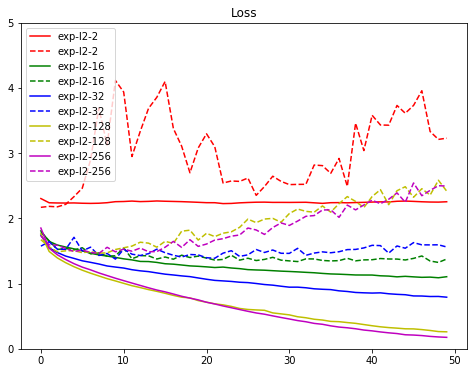

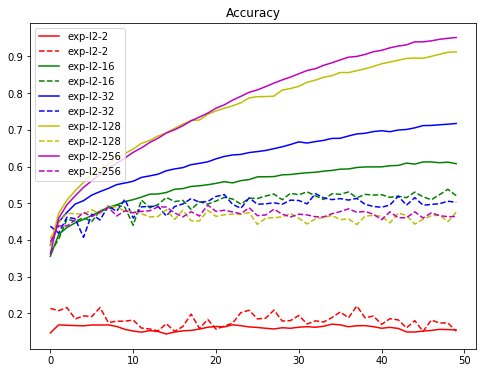

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()